### GITHUB LINK : https://github.com/PRASHIRAWAL/ML-LAB-PROBLEM-STATEMENT- ###

Rank on Kaggle: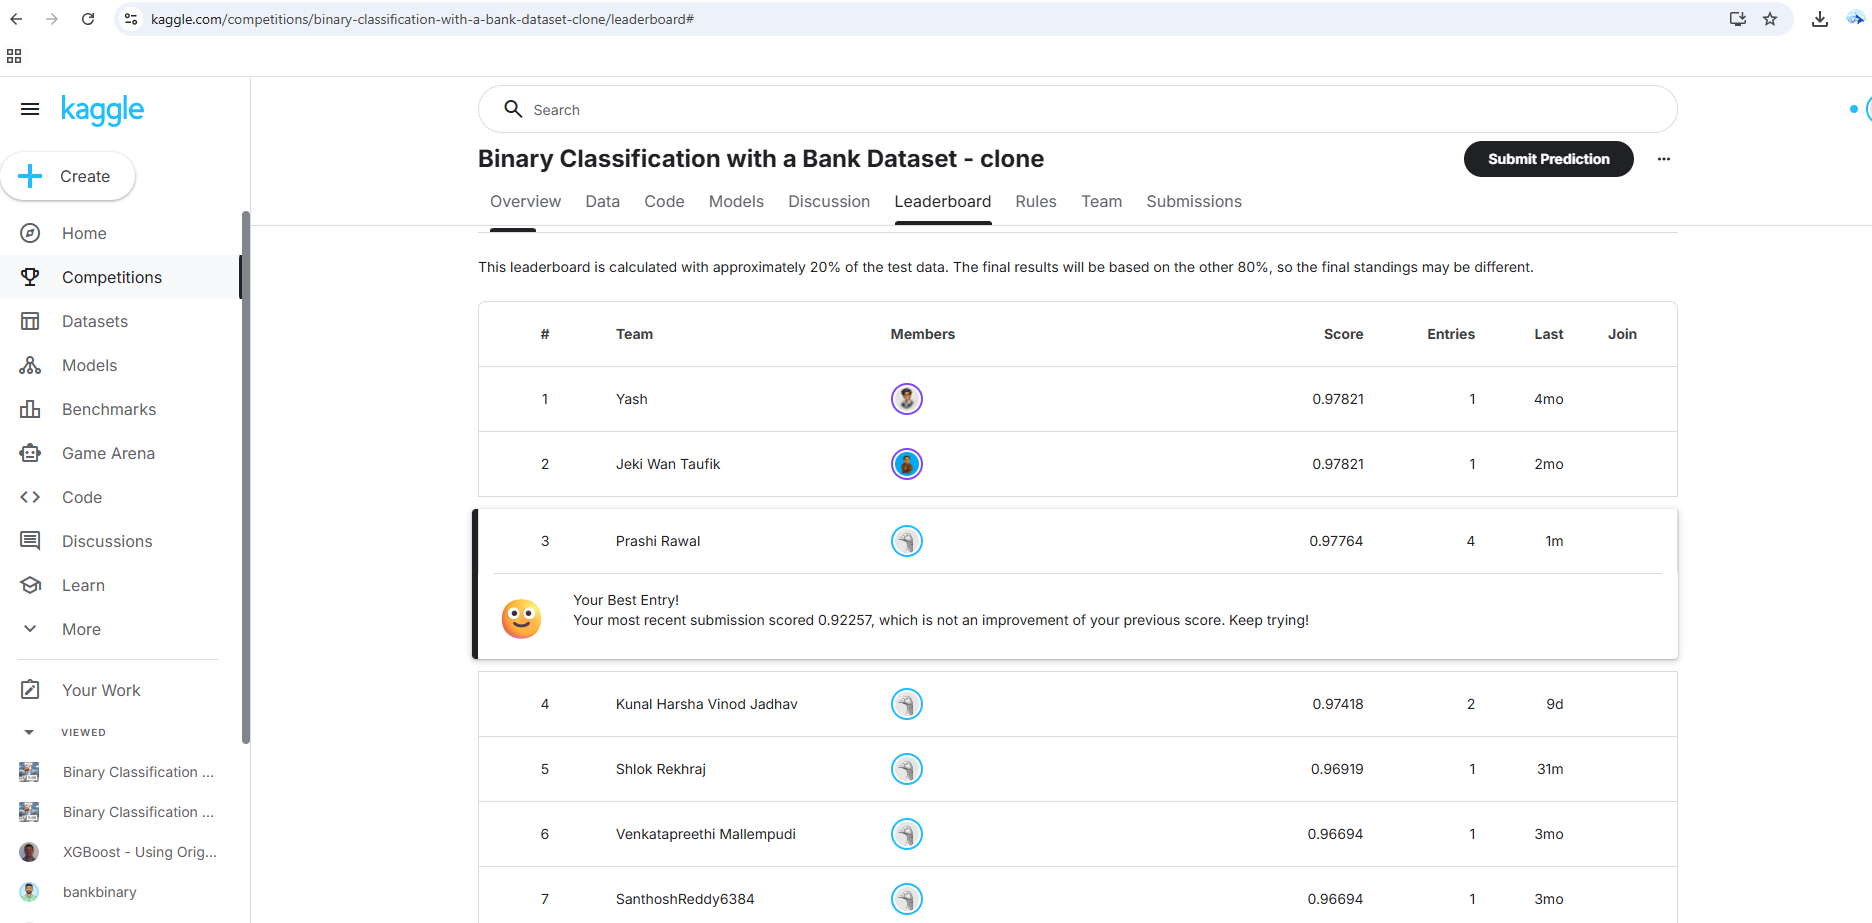

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, classification_report

print("Libraries loaded successfully.")

Libraries loaded successfully.


Loaded the datasets

In [35]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

print("train.csv loaded into DataFrame 'train'.")
print("test.csv loaded into DataFrame 'test'.")

train.csv loaded into DataFrame 'train'.
test.csv loaded into DataFrame 'test'.


Train dataset coloums and features

In [36]:
print("Train DataFrame Head:")
print(train.head())
print("\nTrain DataFrame Shape:")
print(train.shape)
print("\nTrain DataFrame Data Types:")
print(train.dtypes)
print("\nMissing Values in Train DataFrame:")
print(train.isnull().sum())
print("\nDistribution of Target Variable 'y' in Train DataFrame:")
print(train['y'].value_counts())

Train DataFrame Head:
   id  age          job  marital  education default  balance housing loan  \
0   0   42   technician  married  secondary      no        7      no   no   
1   1   38  blue-collar  married  secondary      no      514      no   no   
2   2   36  blue-collar  married  secondary      no      602     yes   no   
3   3   27      student   single  secondary      no       34     yes   no   
4   4   26   technician  married  secondary      no      889     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome  y  
0  cellular   25   aug       117         3     -1         0  unknown  0  
1   unknown   18   jun       185         1     -1         0  unknown  0  
2   unknown   14   may       111         2     -1         0  unknown  0  
3   unknown   28   may        10         2     -1         0  unknown  0  
4  cellular    3   feb       902         1     -1         0  unknown  1  

Train DataFrame Shape:
(750000, 18)

Train DataFrame Data Types:
id   

Test Dataset Columns and Features

In [37]:
print("Test DataFrame Head:")
print(test.head())
print(
"\nTest DataFrame Shape:")
print(test.shape)
print("\nTest DataFrame Data Types:")
print(test.dtypes)
print("\nMissing Values in Test DataFrame:")
print(test.isnull().sum())

test_ids = test['id']
print("\n'id' column from Test DataFrame stored in 'test_ids'.")

Test DataFrame Head:
       id  age            job  marital  education default  balance housing  \
0  750000   32    blue-collar  married  secondary      no     1397     yes   
1  750001   44     management  married   tertiary      no       23     yes   
2  750002   36  self-employed  married    primary      no       46     yes   
3  750003   58    blue-collar  married  secondary      no    -1380     yes   
4  750004   28     technician   single  secondary      no     1950     yes   

  loan   contact  day month  duration  campaign  pdays  previous poutcome  
0   no   unknown   21   may       224         1     -1         0  unknown  
1   no  cellular    3   apr       586         2     -1         0  unknown  
2  yes  cellular   13   may       111         2     -1         0  unknown  
3  yes   unknown   29   may       125         1     -1         0  unknown  
4   no  cellular   22   jul       181         1     -1         0  unknown  

Test DataFrame Shape:
(250000, 17)

Test DataFrame Da

Defining the target

In [38]:
X = train.drop(['id', 'y'], axis=1)
y = train['y']
test_data = test.drop('id', axis=1)

print("Features (X) and target (y) separated from 'train' DataFrame.")
print("'id' column dropped from 'test' DataFrame to create 'test_data'.")

Features (X) and target (y) separated from 'train' DataFrame.
'id' column dropped from 'test' DataFrame to create 'test_data'.


Encoding the features of the test and train datasets

In [39]:
categorical_cols = X.select_dtypes(include='object').columns
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    # Fit on training data
    X[col] = le.fit_transform(X[col])
    # Transform test data
    test_data[col] = le.transform(test_data[col])
    label_encoders[col] = le

print("Categorical encoding completed for both training and test features.")

Categorical encoding completed for both training and test features.


Finding the missing values in the train dataset

In [42]:
print("Missing values in training features (X):\n", X.isnull().sum())

Missing values in training features (X):
 age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64


Finding the missing values in the test dataset

In [41]:
print("Missing values in test features (test_data):\n", test_data.isnull().sum())

Missing values in test features (test_data):
 age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64


Preparing the data for validation

In [44]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Shape of X_train:", X_train.shape)
print("Shape of X_val:", X_val.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_val:", y_val.shape)
print("Data split into training and validation sets successfully.")

Shape of X_train: (600000, 16)
Shape of X_val: (150000, 16)
Shape of y_train: (600000,)
Shape of y_val: (150000,)
Data split into training and validation sets successfully.


Feature Scaling

In [45]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
test_data_scaled = scaler.transform(test_data)

print("Shape of X_train_scaled:", X_train_scaled.shape)
print("Shape of X_val_scaled:", X_val_scaled.shape)
print("Shape of test_data_scaled:", test_data_scaled.shape)
print("Features scaled successfully.")

Shape of X_train_scaled: (600000, 16)
Shape of X_val_scaled: (150000, 16)
Shape of test_data_scaled: (250000, 16)
Features scaled successfully.


Training Logistic Regression Model


In [46]:
model = LogisticRegression(random_state=42, solver='liblinear')
model.fit(X_train_scaled, y_train)

print("Logistic Regression model initialized and trained successfully.")

Logistic Regression model initialized and trained successfully.


Evaluating the model wrt to the test dataset

In [47]:
y_pred_val = model.predict(X_val_scaled)
y_pred_proba_val = model.predict_proba(X_val_scaled)[:, 1]

print("Validation Metrics:")
print("-------------------")

# Confusion Matrix
conf_matrix = confusion_matrix(y_val, y_pred_val)
print("Confusion Matrix:\n", conf_matrix)

# Accuracy
accuracy = accuracy_score(y_val, y_pred_val)
print(f"Accuracy: {accuracy:.4f}")

# Precision
precision = precision_score(y_val, y_pred_val)
print(f"Precision: {precision:.4f}")

# Recall
recall = recall_score(y_val, y_pred_val)
print(f"Recall: {recall:.4f}")

# F1-Score
f1 = f1_score(y_val, y_pred_val)
print(f"F1-Score: {f1:.4f}")

# ROC AUC Score
roc_auc = roc_auc_score(y_val, y_pred_proba_val)
print(f"ROC AUC Score: {roc_auc:.4f}")

# Classification Report
print("\nClassification Report:\n", classification_report(y_val, y_pred_val))

Validation Metrics:
-------------------
Confusion Matrix:
 [[127960   3942]
 [ 10727   7371]]
Accuracy: 0.9022
Precision: 0.6516
Recall: 0.4073
F1-Score: 0.5012
ROC AUC Score: 0.9210

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.97      0.95    131902
           1       0.65      0.41      0.50     18098

    accuracy                           0.90    150000
   macro avg       0.79      0.69      0.72    150000
weighted avg       0.89      0.90      0.89    150000



The ROC Curve

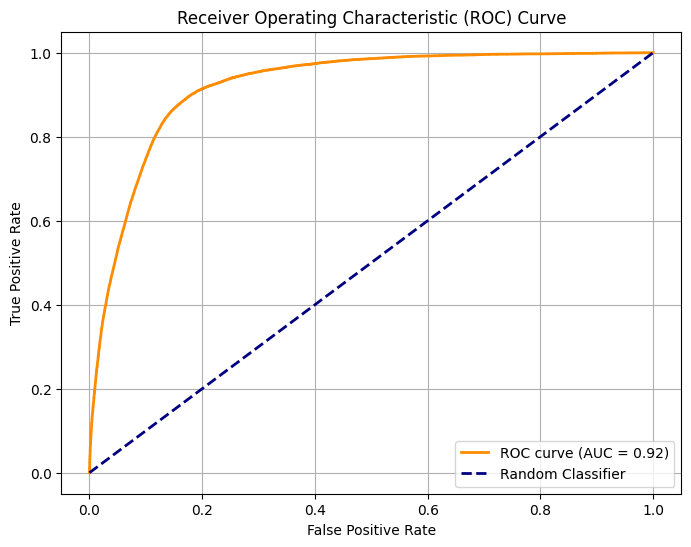

ROC curve plotted successfully.


In [48]:
fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba_val)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

print("ROC curve plotted successfully.")

Generating Predictions for the test dataset

In [49]:
test_predictions_proba = model.predict_proba(test_data_scaled)[:, 1]

print("Probability predictions for the positive class on the test set generated successfully.")
print("Shape of test_predictions_proba:", test_predictions_proba.shape)

Probability predictions for the positive class on the test set generated successfully.
Shape of test_predictions_proba: (250000,)


In [50]:
submission_df = pd.DataFrame({
    'id': test_ids,
    'y': test_predictions_proba
})

submission_df.to_csv('submission.csv', index=False)

print("Submission file 'submission.csv' created successfully.")
print(submission_df.head())


Submission file 'submission.csv' created successfully.
       id         y
0  750000  0.012159
1  750001  0.207175
2  750002  0.007058
3  750003  0.002774
4  750004  0.046352
